# Oefeningen DA

## Imports

In [73]:
import pandas as pd
from functions.functions_Y2.lda import *
from IPython import InteractiveShell

InteractiveShell.ast_node_interactivity = "all"

## Vraag 1

In [74]:
bordeaux = pd.read_csv("../../../data_aux/bordeaux.csv", delimiter=";")

bordeaux

,year,temperature,sun,heat,rain,quality
0,1924,3064,1201,10,361,medium
1,1925,3000,1053,11,338,bad
2,1926,3155,1133,19,393,medium
3,1927,3085,970,4,467,bad
4,1928,3245,1258,36,294,good
5,1929,3267,1386,35,225,good
6,1930,3080,966,13,417,bad
7,1931,2974,1189,12,488,bad
8,1932,3038,1103,14,677,bad
9,1933,3318,1310,29,427,medium


### a)

In [75]:
X = bordeaux[['temperature', 'sun', 'heat', 'rain']]
y = bordeaux['quality']

lda = LinearDiscriminantAnalysis()
lda.fit(X=X, y=y)

dfs1, dfs2, dfs3, dimensions = lda_info(lda, X)

dfs1
dfs2
dfs3
dimensions

LinearDiscriminantAnalysis()

,prior probabilities
bad,0.352941
good,0.323529
medium,0.323529


,temperature,sun,heat,rain
bad,3037.333333,1126.416667,12.083333,430.333333
good,3306.363636,1363.636364,28.545455,305.000000
medium,3140.909091,1262.909091,16.454545,339.636364


,LD1,LD2
temperature,-0.008566,0.000046
sun,-0.006774,0.005329
heat,0.027054,-0.127636
rain,0.005866,-0.006175


2

### b)
De discriminant functie heeft 2 dimensies

### c) /

### d)
79.41% van de voorspelde variabelen waren juist voorspeld.

In [76]:
predo = bordeaux.join(pd.DataFrame(lda.predict(X), columns=['predicted']))[['quality', 'predicted']]

predo[predo['quality'] == predo['predicted']].size / predo.size * 100

79.41176470588235

## Vraag 2

In [77]:
birthwt = pd.read_csv('../../../data_aux/birthwt.csv', delimiter=";")

birthwt

,low,age,lwt,race,smoke,ptl,ht,ui,ftv,bwt
0,0,19,182,2,0,0,0,1,0,2523
1,0,33,155,3,0,0,0,0,3,2551
2,0,20,105,1,1,0,0,0,1,2557
3,0,21,108,1,1,0,0,1,2,2594
4,0,18,107,1,1,0,0,1,0,2600
...,...,...,...,...,...,...,...,...,...,...
184,1,28,95,1,1,0,0,0,2,2466
185,1,14,100,3,0,0,0,0,2,2495
186,1,23,94,3,1,0,0,0,0,2495
187,1,17,142,2,0,0,1,0,0,2495


### a)

In [78]:
birthwt.describe()

,low,age,lwt,race,smoke,ptl,ht,ui,ftv,bwt
count,189.000000,189.000000,189.000000,189.000000,189.000000,189.000000,189.000000,189.000000,189.000000,189.000000
mean,0.312169,23.238095,129.814815,1.846561,0.391534,0.195767,0.063492,0.148148,0.793651,2944.587302
std,0.464609,5.298678,30.579380,0.918342,0.489390,0.493342,0.244494,0.356190,1.059286,729.214295
min,0.000000,14.000000,80.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,709.000000
25%,0.000000,19.000000,110.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2414.000000
50%,0.000000,23.000000,121.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2977.000000
75%,1.000000,26.000000,140.000000,3.000000,1.000000,0.000000,0.000000,0.000000,1.000000,3487.000000
max,1.000000,45.000000,250.000000,3.000000,1.000000,3.000000,1.000000,1.000000,6.000000,4990.000000


### b)
Allemaal

### c)
- age
- lwt
- ptl

### d)

In [79]:
lda = LinearDiscriminantAnalysis()

X = birthwt[['age', 'lwt', 'ptl']]
y = birthwt['low']

lda.fit(X, y)

LinearDiscriminantAnalysis()

### e)

In [80]:
dfs1, dfs2, dfs3, dimensions = lda_info(lda, X, do_print=True)

,prior probabilities
0,0.687831
1,0.312169


,age,lwt,ptl
0,23.661538,133.300000,0.130769
1,22.305085,122.135593,0.338983


,LD1
age,-0.080818
lwt,-0.015740
ptl,1.472406


The LD has 1 dimension(s)


### f)

In [81]:
LD = ld1(lda, X, target=birthwt['low'], index=birthwt.index)
LD
combination = birthwt[['age', 'lwt', 'ptl']].join(LD)
combination

,LD1,Target
0,-0.767140,0
1,-1.473610,0
2,0.364040,0
3,0.236001,0
4,0.494196,0
...,...,...
184,-0.125105,1
185,0.927651,1
186,0.294727,1
187,0.024106,1


,age,lwt,ptl,LD1,Target
0,19,182,0,-0.767140,0
1,33,155,0,-1.473610,0
2,20,105,0,0.364040,0
3,21,108,0,0.236001,0
4,18,107,0,0.494196,0
...,...,...,...,...,...
184,28,95,0,-0.125105,1
185,14,100,0,0.927651,1
186,23,94,0,0.294727,1
187,17,142,0,0.024106,1


(<Figure size 1000x500 with 1 Axes>, <Axes: xlabel='LD1'>)

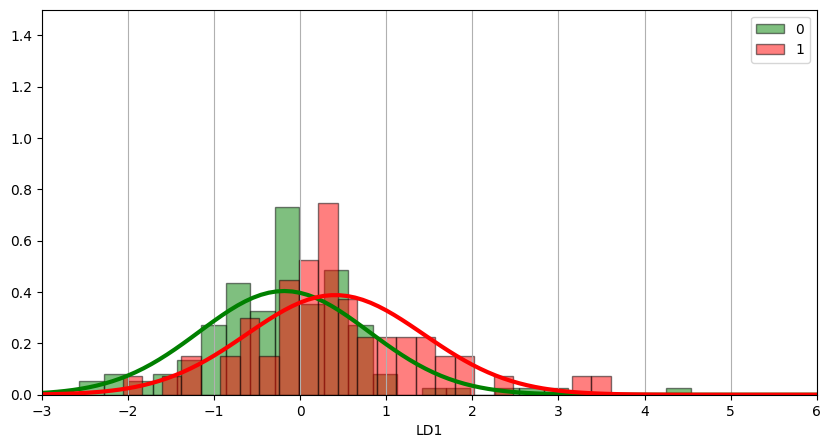

In [82]:
vis_da(LD)

## Vraag 3

In [83]:
cars = pd.read_csv('../../../data_aux/Cars93.csv', delimiter=";", decimal='.')

cars

,Manufacturer,Model,Type,Min.Price,Price,Max.Price,MPG.city,MPG.highway,AirBags,DriveTrain,...,Passengers,Length,Wheelbase,Width,Turn.circle,Rear.seat.room,Luggage.room,Weight,Origin,Make
0,Acura,Integra,Small,12.9,15.9,18.8,25,31,NaN,Front,...,5,177,102,68,37,26.5,11.0,2705,non-USA,Acura Integra
1,Acura,Legend,Midsize,29.2,33.9,38.7,18,25,Driver & Passenger,Front,...,5,195,115,71,38,30.0,15.0,3560,non-USA,Acura Legend
2,Audi,90,Compact,25.9,29.1,32.3,20,26,Driver only,Front,...,5,180,102,67,37,28.0,14.0,3375,non-USA,Audi 90
3,Audi,100,Midsize,30.8,37.7,44.6,19,26,Driver & Passenger,Front,...,6,193,106,70,37,31.0,17.0,3405,non-USA,Audi 100
4,BMW,535i,Midsize,23.7,30.0,36.2,22,30,Driver only,Rear,...,4,186,109,69,39,27.0,13.0,3640,non-USA,BMW 535i
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88,Volkswagen,Eurovan,Van,16.6,19.7,22.7,17,21,NaN,Front,...,7,187,115,72,38,34.0,NaN,3960,non-USA,Volkswagen Eurovan
89,Volkswagen,Passat,Compact,17.6,20.0,22.4,21,30,NaN,Front,...,5,180,103,67,35,31.5,14.0,2985,non-USA,Volkswagen Passat
90,Volkswagen,Corrado,Sporty,22.9,23.3,23.7,18,25,NaN,Front,...,4,159,97,66,36,26.0,15.0,2810,non-USA,Volkswagen Corrado
91,Volvo,240,Compact,21.8,22.7,23.5,21,28,Driver only,Rear,...,5,190,104,67,37,29.5,14.0,2985,non-USA,Volvo 240


### a)

In [84]:
cars.describe()
cars.info()

,Min.Price,Price,Max.Price,MPG.city,MPG.highway,EngineSize,Horsepower,RPM,Rev.per.mile,Fuel.tank.capacity,Passengers,Length,Wheelbase,Width,Turn.circle,Rear.seat.room,Luggage.room,Weight
count,93.000000,93.000000,93.000000,93.000000,93.000000,93.000000,93.000000,93.000000,93.000000,93.000000,93.000000,93.000000,93.000000,93.000000,93.000000,91.000000,82.000000,93.000000
mean,17.125806,19.509677,21.898925,22.365591,29.086022,2.667742,143.827957,5280.645161,2332.204301,16.664516,5.086022,183.204301,103.946237,69.376344,38.956989,27.829670,13.890244,3072.903226
std,8.746029,9.659430,11.030457,5.619812,5.331726,1.037363,52.374410,596.731690,496.506525,3.279370,1.038979,14.602382,6.819674,3.778986,3.223265,2.989072,2.997967,589.896510
min,6.700000,7.400000,7.900000,15.000000,20.000000,1.000000,55.000000,3800.000000,1320.000000,9.200000,2.000000,141.000000,90.000000,60.000000,32.000000,19.000000,6.000000,1695.000000
25%,10.800000,12.200000,14.700000,18.000000,26.000000,1.800000,103.000000,4800.000000,1985.000000,14.500000,4.000000,174.000000,98.000000,67.000000,37.000000,26.000000,12.000000,2620.000000
50%,14.700000,17.700000,19.600000,21.000000,28.000000,2.400000,140.000000,5200.000000,2340.000000,16.400000,5.000000,183.000000,103.000000,69.000000,39.000000,27.500000,14.000000,3040.000000
75%,20.300000,23.300000,25.300000,25.000000,31.000000,3.300000,170.000000,5750.000000,2565.000000,18.800000,6.000000,192.000000,110.000000,72.000000,41.000000,30.000000,15.000000,3525.000000
max,45.400000,61.900000,80.000000,46.000000,50.000000,5.700000,300.000000,6500.000000,3755.000000,27.000000,8.000000,219.000000,119.000000,78.000000,45.000000,36.000000,22.000000,4105.000000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93 entries, 0 to 92
Data columns (total 27 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Manufacturer        93 non-null     object 
 1   Model               93 non-null     object 
 2   Type                93 non-null     object 
 3   Min.Price           93 non-null     float64
 4   Price               93 non-null     float64
 5   Max.Price           93 non-null     float64
 6   MPG.city            93 non-null     int64  
 7   MPG.highway         93 non-null     int64  
 8   AirBags             59 non-null     object 
 9   DriveTrain          93 non-null     object 
 10  Cylinders           93 non-null     object 
 11  EngineSize          93 non-null     float64
 12  Horsepower          93 non-null     int64  
 13  RPM                 93 non-null     int64  
 14  Rev.per.mile        93 non-null     int64  
 15  Man.trans.avail     93 non-null     object 
 16  Fuel.tank.

### b)

In [85]:
training = cars.head(90).fillna(0)

training

testing = cars.tail(3).fillna(0)

testing

,Manufacturer,Model,Type,Min.Price,Price,Max.Price,MPG.city,MPG.highway,AirBags,DriveTrain,...,Passengers,Length,Wheelbase,Width,Turn.circle,Rear.seat.room,Luggage.room,Weight,Origin,Make
0,Acura,Integra,Small,12.9,15.9,18.8,25,31,0,Front,...,5,177,102,68,37,26.5,11.0,2705,non-USA,Acura Integra
1,Acura,Legend,Midsize,29.2,33.9,38.7,18,25,Driver & Passenger,Front,...,5,195,115,71,38,30.0,15.0,3560,non-USA,Acura Legend
2,Audi,90,Compact,25.9,29.1,32.3,20,26,Driver only,Front,...,5,180,102,67,37,28.0,14.0,3375,non-USA,Audi 90
3,Audi,100,Midsize,30.8,37.7,44.6,19,26,Driver & Passenger,Front,...,6,193,106,70,37,31.0,17.0,3405,non-USA,Audi 100
4,BMW,535i,Midsize,23.7,30.0,36.2,22,30,Driver only,Rear,...,4,186,109,69,39,27.0,13.0,3640,non-USA,BMW 535i
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,Toyota,Camry,Midsize,15.2,18.2,21.2,22,29,Driver only,Front,...,5,188,103,70,38,28.5,15.0,3030,non-USA,Toyota Camry
86,Toyota,Previa,Van,18.9,22.7,26.6,18,22,Driver only,4WD,...,7,187,113,71,41,35.0,0.0,3785,non-USA,Toyota Previa
87,Volkswagen,Fox,Small,8.7,9.1,9.5,25,33,0,Front,...,4,163,93,63,34,26.0,10.0,2240,non-USA,Volkswagen Fox
88,Volkswagen,Eurovan,Van,16.6,19.7,22.7,17,21,0,Front,...,7,187,115,72,38,34.0,0.0,3960,non-USA,Volkswagen Eurovan


,Manufacturer,Model,Type,Min.Price,Price,Max.Price,MPG.city,MPG.highway,AirBags,DriveTrain,...,Passengers,Length,Wheelbase,Width,Turn.circle,Rear.seat.room,Luggage.room,Weight,Origin,Make
90,Volkswagen,Corrado,Sporty,22.9,23.3,23.7,18,25,0,Front,...,4,159,97,66,36,26.0,15.0,2810,non-USA,Volkswagen Corrado
91,Volvo,240,Compact,21.8,22.7,23.5,21,28,Driver only,Rear,...,5,190,104,67,37,29.5,14.0,2985,non-USA,Volvo 240
92,Volvo,850,Midsize,24.8,26.7,28.5,20,28,Driver & Passenger,Front,...,5,184,105,69,38,30.0,15.0,3245,non-USA,Volvo 850


### c)
Alle kolommen

### d)
Alle die in interval schaal zitten.

### e)

In [86]:
X = training[
    ['Min.Price', 'Price', 'Max.Price', 'MPG.city', 'MPG.highway', 'EngineSize', 'Horsepower', 'RPM', 'Rev.per.mile',
     'Fuel.tank.capacity', 'Passengers', 'Length', 'Wheelbase', 'Width', 'Turn.circle', 'Rear.seat.room',
     'Luggage.room', 'Weight']]

y = training['Type']

X

y

,Min.Price,Price,Max.Price,MPG.city,MPG.highway,EngineSize,Horsepower,RPM,Rev.per.mile,Fuel.tank.capacity,Passengers,Length,Wheelbase,Width,Turn.circle,Rear.seat.room,Luggage.room,Weight
0,12.9,15.9,18.8,25,31,1.8,140,6300,2890,13.2,5,177,102,68,37,26.5,11.0,2705
1,29.2,33.9,38.7,18,25,3.2,200,5500,2335,18.0,5,195,115,71,38,30.0,15.0,3560
2,25.9,29.1,32.3,20,26,2.8,172,5500,2280,16.9,5,180,102,67,37,28.0,14.0,3375
3,30.8,37.7,44.6,19,26,2.8,172,5500,2535,21.1,6,193,106,70,37,31.0,17.0,3405
4,23.7,30.0,36.2,22,30,3.5,208,5700,2545,21.1,4,186,109,69,39,27.0,13.0,3640
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,15.2,18.2,21.2,22,29,2.2,130,5400,2340,18.5,5,188,103,70,38,28.5,15.0,3030
86,18.9,22.7,26.6,18,22,2.4,138,5000,2515,19.8,7,187,113,71,41,35.0,0.0,3785
87,8.7,9.1,9.5,25,33,1.8,81,5500,2550,12.4,4,163,93,63,34,26.0,10.0,2240
88,16.6,19.7,22.7,17,21,2.5,109,4500,2915,21.1,7,187,115,72,38,34.0,0.0,3960


0       Small
1     Midsize
2     Compact
3     Midsize
4     Midsize
       ...   
85    Midsize
86        Van
87      Small
88        Van
89    Compact
Name: Type, Length: 90, dtype: object

In [87]:
lda = LinearDiscriminantAnalysis()

lda.fit(X, y)

lda_info(lda, X, do_print=True)

LinearDiscriminantAnalysis()

,prior probabilities
Compact,0.166667
Large,0.122222
Midsize,0.233333
Small,0.233333
Sporty,0.144444
Van,0.100000


,Min.Price,Price,Max.Price,MPG.city,MPG.highway,EngineSize,Horsepower,RPM,Rev.per.mile,Fuel.tank.capacity,Passengers,Length,Wheelbase,Width,Turn.circle,Rear.seat.room,Luggage.room,Weight
Compact,15.286667,17.913333,20.540000,22.800000,30.000000,2.333333,132.133333,5360.000000,2493.000000,16.086667,5.066667,181.600000,102.666667,67.266667,38.333333,27.833333,13.666667,2913.666667
Large,22.936364,24.300000,25.672727,18.363636,26.727273,4.209091,179.454545,4672.727273,1626.818182,19.090909,6.000000,204.818182,113.272727,74.727273,42.636364,31.454545,18.272727,3695.454545
Midsize,24.080952,27.242857,30.400000,19.523810,26.666667,3.090476,173.333333,5295.238095,2217.142857,18.409524,5.142857,192.952381,107.523810,70.714286,40.285714,28.500000,15.000000,3407.380952
Small,8.428571,10.166667,11.904762,29.857143,35.476190,1.595238,91.000000,5633.333333,2817.380952,12.619048,4.619048,167.190476,96.571429,65.285714,35.142857,26.452381,12.000000,2312.857143
Sporty,16.392308,19.092308,21.823077,22.076923,29.076923,2.469231,158.769231,5361.538462,2308.846154,15.753846,3.692308,176.461538,98.230769,69.538462,39.076923,19.615385,9.384615,2906.538462
Van,16.200000,19.100000,22.033333,17.000000,21.888889,3.200000,149.444444,4744.444444,2106.111111,20.944444,7.111111,185.666667,112.444444,73.222222,41.777778,30.500000,0.000000,3830.555556


,LD1,LD2,LD3,LD4,LD5
Min.Price,1.922972,-1.667231,-7.126883,0.385124,3.605110
Price,-3.853799,3.551171,14.229159,-0.908130,-7.430812
Max.Price,1.927939,-1.846270,-7.160133,0.490618,3.696957
MPG.city,-0.022991,-0.002207,0.051799,-0.172453,-0.290274
MPG.highway,0.107099,0.012925,0.070808,0.119999,0.259512
EngineSize,-0.447701,0.394799,1.513914,-0.713254,0.035666
Horsepower,-0.013268,0.011286,0.010555,0.013912,0.027317
RPM,-0.000478,0.000017,0.000619,-0.000800,-0.001352
Rev.per.mile,-0.000025,-0.000281,0.000063,0.000841,-0.000332
Fuel.tank.capacity,0.162803,0.134609,0.038897,0.297470,-0.002012


The LD has 5 dimension(s)


(<pandas.io.formats.style.Styler at 0x1363340ced0>,
 5)

### f)
De DA heeft 5 dimensies

### g)

In [105]:
X_predict = testing[
    ['Min.Price', 'Price', 'Max.Price', 'MPG.city', 'MPG.highway', 'EngineSize', 'Horsepower', 'RPM', 'Rev.per.mile',
     'Fuel.tank.capacity', 'Passengers', 'Length', 'Wheelbase', 'Width', 'Turn.circle', 'Rear.seat.room',
     'Luggage.room', 'Weight']]

pred = pd.DataFrame(lda.predict(X_predict), columns=['Prediction'], dtype=object)

testing.reset_index(drop=True).join(pred)[['Type', 'Prediction']]

,Type,Prediction
0,Sporty,Compact
1,Compact,Compact
2,Midsize,Midsize


2 van de 3 auto's zijn juist voorspeld